# This Notebook Contains 3D Grid creation and Cell Declustering

In [1]:
import pandas as pd

In [2]:
data = pd.read_excel("Fecto.xlsx")

In [3]:
data_small = data[['x','y']]
data_small.head()

,x,y
0,3115490,1144717
1,3115490,1144717
2,3115490,1144717
3,3115490,1144717
4,3115490,1144717


In [4]:
clean = data_small.drop_duplicates()

In [5]:
clean.shape

(91, 2)

In [6]:
arr = clean.values

In [7]:
arr.shape

(91, 2)

In [8]:
import numpy as np
from scipy.spatial import distance

In [9]:
number = 2
dist_metric = "euclidean"
trainCoordinates = arr
train_train_dst = distance.cdist(trainCoordinates,trainCoordinates, dist_metric)  

In [10]:
train_train_dst

array([[  0.        , 214.18916873, 269.13379572, ..., 465.92917917,
        410.53379885, 333.40215956],
       [214.18916873,   0.        , 164.56001945, ..., 390.0064102 ,
        460.66582248, 129.55307793],
       [269.13379572, 164.56001945,   0.        , ..., 227.5543891 ,
        321.99534158, 254.69982332],
       ...,
       [465.92917917, 390.0064102 , 227.5543891 , ...,   0.        ,
        254.69982332, 455.63252737],
       [410.53379885, 460.66582248, 321.99534158, ..., 254.69982332,
          0.        , 572.75212789],
       [333.40215956, 129.55307793, 254.69982332, ..., 455.63252737,
        572.75212789,   0.        ]])

In [11]:
test_neighbors = []
for i in range(0, trainCoordinates.shape[0]):
    indices = np.argsort(train_train_dst[i])
    sampleNumbers = indices[list(range(number))][1]
    neighbor_samples = trainCoordinates[sampleNumbers].reshape(1,2)
    neighbor_distance = train_train_dst[i][sampleNumbers].reshape(1,1)
    neighbors = np.concatenate((neighbor_samples,neighbor_distance),axis=1)
    test_neighbors.append(neighbors.tolist()[0])

In [12]:
np.array(test_neighbors).shape

(91, 3)

In [13]:
np.array(test_neighbors)[:,2].mean()

27.50099833061911

In [14]:
xmin = data['x'].min()
xmax = data['x'].max()
ymin = data['y'].min()
ymax = data['y'].max()
zmin = data['z'].min()
zmax = data['z'].max()

Area = (xmax-xmin)*(ymax-ymin)*(zmax-zmin)

In [15]:
Area

175566528.0

In [54]:
x = np.arange(xmin-1,xmax+1,27.5)
y = np.arange(ymin-1,ymax+1,27.5)
z = np.arange(zmin-1,zmax+1,3)

In [55]:
xAxis, yAxis = np.meshgrid(x, y, sparse=True)
grid = np.concatenate((xAxis,np.repeat(yAxis[0],xAxis.shape[1]).reshape(1,-1)),axis=0).T
for i in range(1,yAxis.shape[0]):    
    arr0 = np.concatenate((xAxis,np.repeat(yAxis[i],xAxis.shape[1]).reshape(1,-1)),axis=0).T
    grid = np.concatenate((grid,arr0),axis=0)

In [56]:
grid.shape

(768, 2)

In [57]:
x.shape[0]*y.shape[0]

768

In [58]:
grid

array([[3115263. , 1144470. ],
       [3115290.5, 1144470. ],
       [3115318. , 1144470. ],
       ...,
       [3115840.5, 1145322.5],
       [3115868. , 1145322.5],
       [3115895.5, 1145322.5]])

In [59]:
grid = grid.reshape(grid.shape[0],grid.shape[1],1)
zAxis = z.reshape(1,1,z.shape[0])

In [60]:
grid3D = np.repeat(grid,zAxis.shape[2],axis=0)
grid3D.shape

(83712, 2, 1)

In [61]:
lst = []
for i in range(grid.shape[0]):
    start = i*zAxis.shape[2]
    stop = (i+1)*zAxis.shape[2]
    arr = grid3D[start:stop].reshape(-1,2)
    grid3D_F = np.concatenate((arr,zAxis[0,0].reshape(-1,1)),
                          axis=1)
    lst.append(grid3D_F)

In [62]:
FinalGrid = np.concatenate(lst)

In [63]:
FinalGrid.shape

(83712, 3)

In [64]:
x.shape[0]*y.shape[0]*z.shape[0]

83712

In [65]:
values[:,0]

array([3115490., 3115490., 3115490., 3115490., 3115490., 3115490.,
       3115490., 3115691., 3115691., 3115691., 3115691., 3115691.,
       3115691., 3115691., 3115691., 3115633., 3115633., 3115633.,
       3115633., 3115633., 3115633., 3115633., 3115633., 3115548.,
       3115548., 3115548., 3115548., 3115548., 3115548., 3115548.,
       3115548., 3115692., 3115692., 3115692., 3115692., 3115692.,
       3115692., 3115692., 3115692., 3115642., 3115642., 3115642.,
       3115642., 3115642., 3115642., 3115642., 3115642., 3115671.,
       3115671., 3115671., 3115671., 3115671., 3115671., 3115671.,
       3115671., 3115653., 3115653., 3115653., 3115653., 3115653.,
       3115653., 3115653., 3115653., 3115574., 3115574., 3115574.,
       3115574., 3115574., 3115574., 3115574., 3115574., 3115496.,
       3115496., 3115496., 3115496., 3115496., 3115496., 3115496.,
       3115496., 3115490., 3115490., 3115490., 3115490., 3115490.,
       3115490., 3115490., 3115490., 3115528., 3115528., 31155

In [66]:
sample = []
for i in range(836):
    xSearch = values[i,0]==FinalGrid[:,0]
    ySearch = values[i,1]==FinalGrid[:,1]
    zSearch = values[i,2]==FinalGrid[:,2]
    if np.any(xSearch):# & ySearch & zSearch):
        sample.append(i)
    if np.any(ySearch):# & ySearch & zSearch):
        sample.append(i)
    if np.any(zSearch):# & ySearch & zSearch):
        sample.append(i)

In [67]:
len(sample)

16

In [68]:
x

array([3115263. , 3115290.5, 3115318. , 3115345.5, 3115373. , 3115400.5,
       3115428. , 3115455.5, 3115483. , 3115510.5, 3115538. , 3115565.5,
       3115593. , 3115620.5, 3115648. , 3115675.5, 3115703. , 3115730.5,
       3115758. , 3115785.5, 3115813. , 3115840.5, 3115868. , 3115895.5])

In [69]:
values = data[['x','y','z']].values

In [70]:
values.shape

(836, 3)

In [71]:
blocks = []
num = 0
for i in range(1,len(x)):
    for ii in range(1,len(y)):
        for iii in range(1,len(z)):
            xSearch = (values[:,0]>=x[i-1]) & (values[:,0]<x[i])
            ySearch = (values[:,1]>=y[ii-1]) & (values[:,1]<y[ii])
            zSearch = (values[:,2]>=z[iii-1]) & (values[:,2]<z[iii])
            if np.any(xSearch & ySearch & zSearch):
                num+=1
                result = values[xSearch & ySearch & zSearch]
                blocks.append(result)
num

690

In [72]:
num = 0
for i in blocks:
    num+=len(i)

In [73]:
num

819

In [74]:
blocks[0]

array([[3.115280e+06, 1.145153e+06, 7.178300e+02]])

In [75]:
values[np.where((values == blocks[0][0]).all(axis=1))]

array([[3.115280e+06, 1.145153e+06, 7.178300e+02]])

In [76]:
blocks[0].tolist()

[[3115280.0, 1145153.0, 717.83]]

In [77]:
for i in blocks:
    weights = 1/len(i)

In [78]:
N_values = np.concatenate((values, np.ones(values.shape[0]).reshape(-1,1)),axis=1)

In [79]:
N_values

array([[3.115490e+06, 1.144717e+06, 6.005000e+02, 1.000000e+00],
       [3.115490e+06, 1.144717e+06, 5.975000e+02, 1.000000e+00],
       [3.115490e+06, 1.144717e+06, 5.945000e+02, 1.000000e+00],
       ...,
       [3.115819e+06, 1.144771e+06, 5.055000e+02, 1.000000e+00],
       [3.115819e+06, 1.144771e+06, 5.025000e+02, 1.000000e+00],
       [3.115819e+06, 1.144771e+06, 5.005000e+02, 1.000000e+00]])

In [90]:
num = 0
block_combined = []
for i in blocks:
    weights = 1/len(i)
    if len(i)==1:
        N_values[np.where((values == i[0]).all(axis=1)),3]=weights
    else:
        block_combined.append(len(i))
        for ii in i:
            N_values[np.where((values == [ii]).all(axis=1)),3]=weights
        num+=1

print(num)

111


In [93]:
from collections import Counter
Counter(block_combined)

Counter({2: 97, 3: 11, 5: 1, 4: 2})

In [83]:
N_values

array([[3.115490e+06, 1.144717e+06, 6.005000e+02, 1.000000e+00],
       [3.115490e+06, 1.144717e+06, 5.975000e+02, 1.000000e+00],
       [3.115490e+06, 1.144717e+06, 5.945000e+02, 1.000000e+00],
       ...,
       [3.115819e+06, 1.144771e+06, 5.055000e+02, 1.000000e+00],
       [3.115819e+06, 1.144771e+06, 5.025000e+02, 5.000000e-01],
       [3.115819e+06, 1.144771e+06, 5.005000e+02, 5.000000e-01]])

In [121]:
np.savetxt("weights.csv", N_values, delimiter=",")

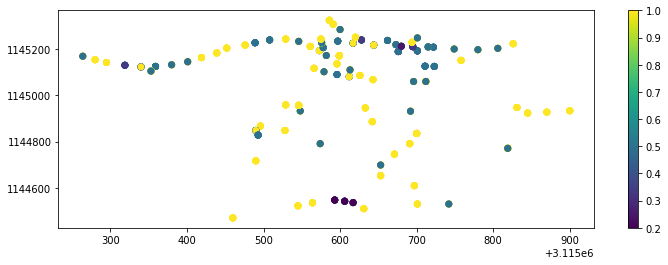

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.scatter(N_values[:,0],N_values[:,1],c=N_values[:,3])
plt.colorbar()

In [97]:
len(N_values[N_values[:,3]<1])

240

In [98]:
len(N_values[N_values[:,3]<0.5])

46

In [118]:
col = ['CaO', 'Al2O3', 'Fe2O3', 'MgO', 'K2O', 'SiO2', 'Na2O','SO3']

for i in col:
    data[i] = data[i]*N_values[:,3]

In [119]:
data

,x,y,z,CaO,Al2O3,Fe2O3,MgO,K2O,SiO2,Na2O,SO3
0,3115490,1144717,600.5,28.49,8.78,3.190,0.30,0.890,29.80,0.4,0.0
1,3115490,1144717,597.5,29.91,9.24,3.920,0.00,0.720,27.70,0.2,0.0
2,3115490,1144717,594.5,17.20,13.40,5.430,0.60,1.090,40.20,0.4,0.0
3,3115490,1144717,591.5,21.44,11.97,5.000,0.40,1.070,35.50,0.5,0.0
4,3115490,1144717,588.5,15.65,13.09,5.150,0.50,1.220,44.00,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
831,3115819,1144771,511.5,54.01,0.23,0.220,0.70,0.020,1.10,0.0,0.1
832,3115819,1144771,508.5,53.26,0.44,0.370,1.20,0.030,2.10,0.0,0.1
833,3115819,1144771,505.5,53.47,0.37,0.360,1.10,0.030,2.00,0.0,0.1
834,3115819,1144771,502.5,26.94,0.11,0.175,0.35,0.015,0.95,0.0,0.0


In [120]:
data.to_excel("data_weighted.xlsx")